## Preprocess the Data for Dataset for YOLO Model

This is divided into 3 Chapters
- Chapter 1: transform a Radargramm into a image for a YOLO model
- Chapter 2: Create multiple images out of Our given Data
- Chapter 3: Normalize the Series of Images
- Chapter 4: Annotating/Labeling the Data

### Chapter 1
Here we try to transform a Radargramm to an Image we can use here our class which is implemented to load the Data we can find it at **Pipeline/Datatoolkit**

Since we have two Datasets given by our industrial Partner we load both

In [1]:
#Setting Working directory
import sys
from pathlib import Path

sys.path.append(str(Path.cwd().parent))

#Import the config file so that only the Filename needs to be changed in the _read_segy function
from config import *

from Pipeline.Datatoolkit import DatatoolKit

dk1 = DatatoolKit(TEST_FILE_DIR,"UG3DQUERUNTERZUG.SGY")
dk2 = DatatoolKit(TEST_FILE_DIR,"EG-3D QUER001.SGY")


file1 = dk1.LoadSGY()
file2 = dk2.LoadSGY()


Next step is to create the Dataframes



In [2]:
df1 = dk1.create_df(file1)
df2 = dk2.create_df(file2)

We can Analyze our Date by plotting the Grid and using the analyser.

In [5]:
dk1.analyse_datetype(df2, True)

Inlines: 72, Crosslines: 2211
Traces: 159192, Unique Pairs: 159192
Number of duplicated combinations: 0
Datatype: 3D (unique combinations)
crossline  1     2     3     4     5     6     7     8     9     10    ...  \
inline                                                                 ...   
0             1     1     1     1     1     1     1     1     1     1  ...   
1             1     1     1     1     1     1     1     1     1     1  ...   
2             1     1     1     1     1     1     1     1     1     1  ...   
3             1     1     1     1     1     1     1     1     1     1  ...   
4             1     1     1     1     1     1     1     1     1     1  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
67            1     1     1     1     1     1     1     1     1     1  ...   
68            1     1     1     1     1     1     1     1     1     1  ...   
69            1     1     1     1     1     1     1     1     1     1  ...   
70 

crossline  1     2     3     4     5     6     7     8     9     10    ...  \
inline                                                                 ...   
0             1     1     1     1     1     1     1     1     1     1  ...   
1             1     1     1     1     1     1     1     1     1     1  ...   
2             1     1     1     1     1     1     1     1     1     1  ...   
3             1     1     1     1     1     1     1     1     1     1  ...   
4             1     1     1     1     1     1     1     1     1     1  ...   
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  ...   
67            1     1     1     1     1     1     1     1     1     1  ...   
68            1     1     1     1     1     1     1     1     1     1  ...   
69            1     1     1     1     1     1     1     1     1     1  ...   
70            1     1     1     1     1     1     1     1     1     1  ...   
71            1     1     1     1     1     1     1     1     1     1  ...   

crossline  2202  2203  2204  2205  2206  2207  2208  2209  2210  2211  
inline                                                                 
0             1     1     1     1     1     1     1     1     1     1  
1             1     1     1     1     1     1     1     1     1     1  
2             1     1     1     1     1     1     1     1     1     1  
3             1     1     1     1     1     1     1     1     1     1  
4             1     1     1     1     1     1     1     1     1     1  
...         ...   ...   ...   ...   ...   ...   ...   ...   ...   ...  
67            1     1     1     1     1     1     1     1     1     1  
68            1     1     1     1     1     1     1     1     1     1  
69            1     1     1     1     1     1     1     1     1     1  
70            1     1     1     1     1     1     1     1     1     1  
71            1     1     1     1     1     1     1     1     1     1  

[72 rows x 2211 columns]

### Our Radargramm looks like this at the Moment

##### Inline Plot

This is the same Plot as in the Notebook **Analyzing the Data** here we plot all crosslines according to one inline so we have one sphere her we make the Plot now for both Datasets

**please note that it is only one inline**

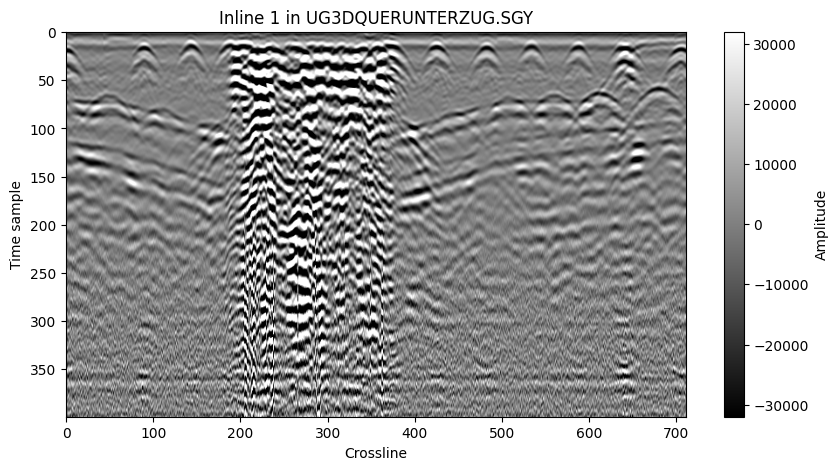

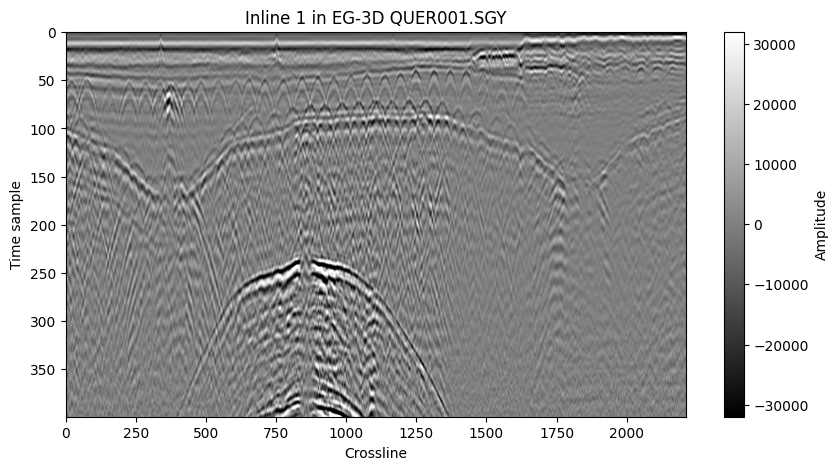

In [7]:
#function to plot crosslines on the x-axis and on the y-Axis the time samples
dk1.plot_inline_cut_raw(df1, 1)
dk2.plot_inline_cut_raw(df2, 1)

#### Crossline Plot

This is the same Plot as in the Notebook **Analyzing the Data** here we plot all inlines according to one crosslines so we have one sphere we plot also for both datasets

**please Note that it is only one Crossline**

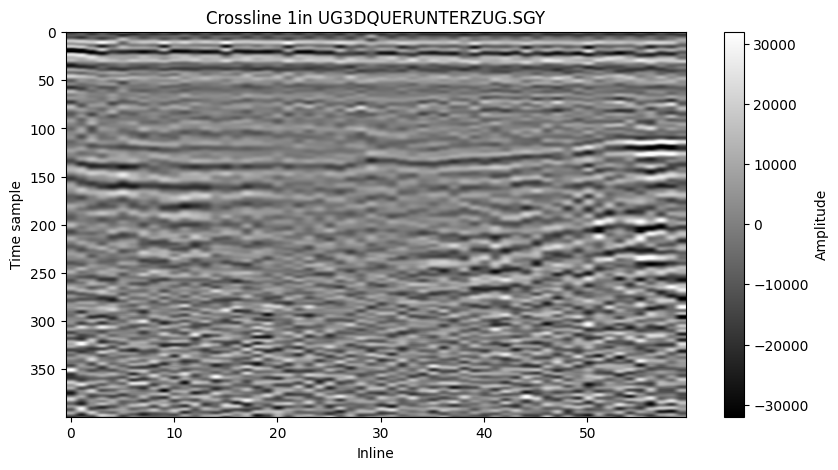

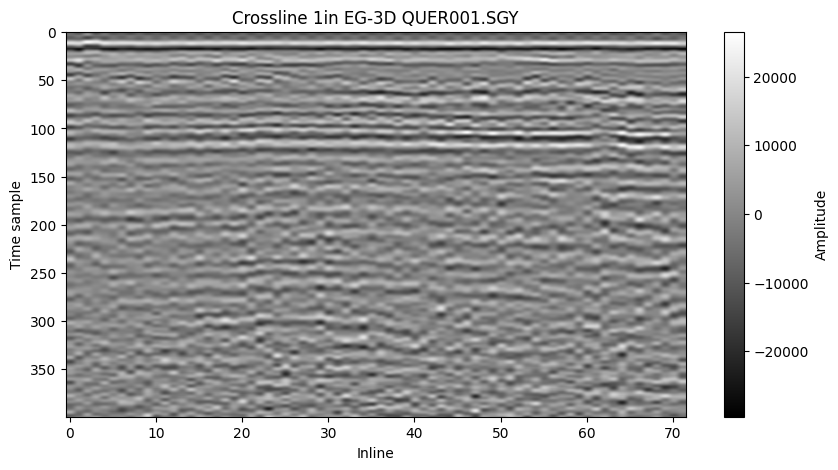

In [8]:
dk1.plot_crossline_cut_raw(df1, 1)
dk2.plot_crossline_cut_raw(df2, 1)

### Time slice Plot

This is the same Plot as in the Notebook **Analyzing the Data** here we plot the complete Grid from a top down view so we have the sphere threw time points here we also create the plots for both datasets

**Please Note that it is only one timeslice**

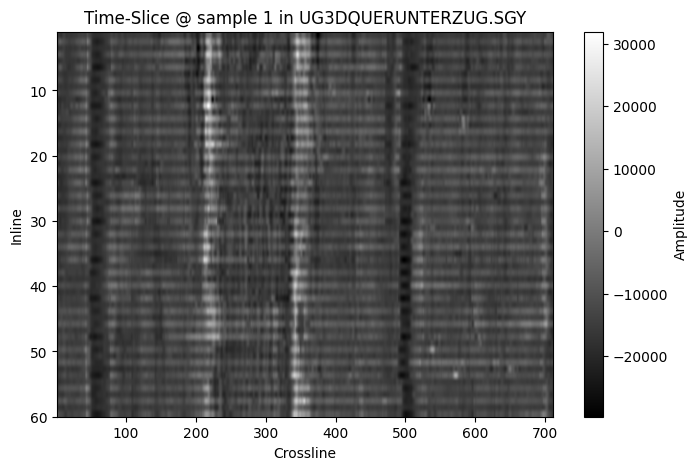

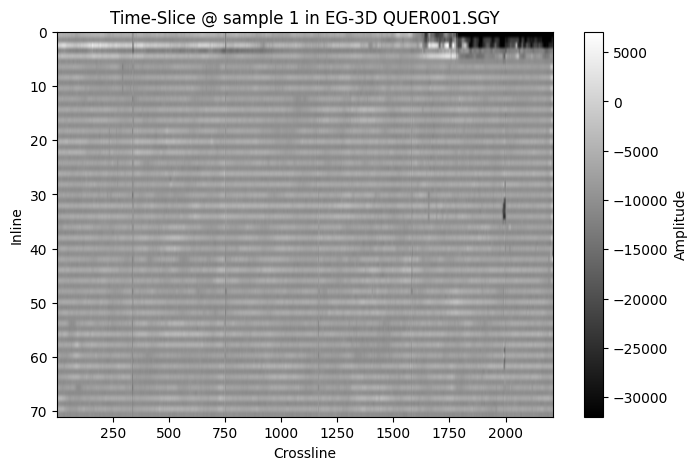

In [9]:
dk1.plot_timeslice_cut_raw(df1, 1)
dk2.plot_timeslice_cut_raw(df2 ,1)

So for the further steps in **Chapter 1** we focus on the the inline Plots because we have much more density as we can see from the radargramms above. And also because the strategy is first to detect hyperbolas on spheres.

In [5]:
import pandas as pd
# here we compare de density from Inline and crossline Plots by simple plot the inline X Crossline and Crossline X inline
inlinenr = 1
crosslinenr = 1

#Inline cut density
sub_file1_in = df1[df1["inline"] == inlinenr].sort_values("crossline")
sub_file2_in = df2[df2["inline"] == inlinenr].sort_values("crossline")

#crossline cut density
sub_file1_cr = df1[df1["crossline"] == crosslinenr].sort_values("inline")
sub_file2_cr = df2[df2["crossline"] == crosslinenr].sort_values("inline")



d = {"Datasource": ["file1", "file2", "file1", "file2"], 
     "plottype": ["inline cut", "inline cut", "crossline cut", "crossline cut"], 
     "Spherenr": [inlinenr, inlinenr, crosslinenr, crosslinenr],
     "traces for cut": [len(sub_file1_in), len(sub_file2_in), len(sub_file1_cr), len(sub_file2_cr)]}

df_density = pd.DataFrame(d)

df_density



Datasource       plottype  Spherenr  traces for cut
0      file1     inline cut         1             711
1      file2     inline cut         1            2211
2      file1  crossline cut         1              60
3      file2  crossline cut         1              72

### Creating an Image out of SGY Data for YOLO

The Code for that ist pretty straightforward. Because we want basically a plot without the axis description and titles so the full Plot is the radargramm.

first we try it for one inline. The Goal is to realy just have alle the Data in one Image.
And this without axis and so on


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
inline_nr = 1
sub = df1[df1["inline"] == inline_nr].sort_values("crossline")
radar_img = np.vstack(sub["Amplitude"].values).T  # (samples x traces)
plt.imsave("inline_036.png", radar_img, cmap="gray")
plt.close()



Now we can implement a function which create Images for every inline, crossline or time slice. And use that function for every Datasource

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

def create_train_images(df, Inline:bool, crossline:bool, timeslice:bool):
    
    inlines = sorted(df["inline"].unique())
    for inline_nr in inlines:
        filename = df.loc[df["inline"] == inline_nr, "filename"].iloc[0]
        sub = df[df["inline"] == inline_nr].sort_values("crossline")
        img = np.vstack(sub["Amplitude"].values).T
        outdir = TRAIN_DIR
        out_path = os.path.join(outdir, f"{filename}_inline_{inline_nr}.png")
        plt.imsave(out_path, img, cmap="grey")

    print(f"saved {inline_nr} images to {out_path}")




In [12]:
create_train_images(df1)

saved 60 images to c:\pythonad\PAINDHS25\PAINDGPR\Data\Train\UG3DQUERUNTERZUG.SGY_inline_60.png


In [13]:
create_train_images(df2)

saved 71 images to c:\pythonad\PAINDHS25\PAINDGPR\Data\Train\EG-3D QUER001.SGY_inline_71.png
